## Home Credit Risk
Tujuan utamanya adalah untuk menganalisis faktor-faktor yang memengaruhi kemungkinan nasabah mengalami keterlambatan pembayaran (TARGET == 1).

Kolom SK_ID_CURR akan menjadi identitas utama join dari beberapa tabel.
Selain itu, terdapat kolom SK_ID_BUREAU yang merupakan ID unik setiap kredit historis setiap nasabah

Artinya, SK_ID_CURR merepresentasikan data nasabah, sedangkan SK_BUREAU_ID merepresentasikan data unik setiap kredit historis milik nasabah

### Configuration

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

## Read Data

In [6]:
train_data = pd.read_csv('./dataset/application_train.csv') 
# test_data = pd.read_csv('dataset/test.csv')

train_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bureau_balance_data = pd.read_csv('./dataset/bureau_balance.csv')
bureau_balance_data.head(10)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [8]:
# Print apa saja nilai baris yang unik dari kolom status
bureau_balance_data['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

| STATUS | Arti                          | Penjelasan                                            |
| ------ | ----------------------------- | ----------------------------------------------------- |
| **0**  | *Performed*                   | Pembayaran lancar pada bulan tersebut.                |
| **1**  | *1–30 days past due*          | Terlambat 1–30 hari. Risiko rendah.                   |
| **2**  | *31–60 days past due*         | Terlambat 31–60 hari. Risiko meningkat.               |
| **3**  | *61–90 days past due*         | Terlambat 61–90 hari. Risiko tinggi.                  |
| **4**  | *91–120 days past due*        | Terlambat 91–120 hari.                                |
| **5**  | *More than 120 days past due* | Keterlambatan sangat parah, >120 hari.                |
| **C**  | *Closed*                      | Kredit ditutup pada bulan tersebut.                   |
| **X**  | *No loan for the month*       | Tidak ada informasi bulan itu (missing, bukan telat). |


In [9]:
bureau_data = pd.read_csv('./dataset/bureau.csv')
bureau_data.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [10]:
credit_card_balance_data = pd.read_csv('./dataset/credit_card_balance.csv')
credit_card_balance_data.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


In [11]:
installments_payments_data = pd.read_csv('./dataset/installments_payments.csv')
installments_payments_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [12]:
pos_cash_balance_data = pd.read_csv('./dataset/POS_CASH_balance.csv')
pos_cash_balance_data.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [13]:
previous_application_data = pd.read_csv('./dataset/previous_application.csv')
previous_application_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## Data Aggregation

Selanjutnya, akan dibuat fungsi aggregator yang mengambil banyak baris (multi-row) dan diubah menjadi satu nilai, seperti mean, min, max, sum.

Mengapa mean, min, max, dan sum yang dipilih:
- mean: merepresentasikan kondisi umum dari para peminjam
- min: kondisi terburuk dari representasi peminjam
- max: kondisi terbaik atau exposure dari representasi peminjam
- sum: total beban yang ditanggung oleh peminjam

Tentunya, tidak semua digunakan untuk aggregasi bergantung pada situasi dan kondisi data saat eksplorasi

Karena dataset Home Credit memiliki multi table relational dataset, maka 1 peminjam bisa memiliki banyak catatan pinjaman, seperti:
- Banyak previous loans
- Banyak credit bureau records
- Banyak transaksi kartu kredit
- Banyak angsuran pembayaran

Karena model hanya menerima 1 baris hanya direpresentasikan 1 peminjam, bukan ribuan baris dari tabel lain. Maka dari itu, SK_ID_CURR harus di aggregasi menjadi 1 baris per peminjam.

Hal ini dilakukan melalui fungsi aggregasi perbedaan antar peminjam yang akan dilihat oleh model.

In [14]:
num_agg = ['mean', 'max', 'min', 'sum']

![Bureau BB](./image/bureau-bb.png "Bureau.csv - Bureau Balance relational")

Pertama, aggregasi akan dilakukan pada bureau.csv dan bureau_balance.csv. Karena bureau.csv one to many ke bureau_balance. Aggregate dilakukan lalu join ke bureau.csv

MONTH_BALANCE menggunakan num_agg karena

STATUS menggunakan `lambda x: x.value_counts().index[0]` artinya, pilih status yang paling sering muncul (modus) untuk setiap SK_ID_BUREAU. Hal ini karena kita ingin mewakilkan perilaku kredit tersebut dengan satu nilai sehingga nilai yang paling sering muncul merefleksikan perilaku paling dominan dari setiap SK_ID_BUREAU.

In [15]:
bb_agg = bureau_balance_data.groupby('SK_ID_BUREAU').agg({
  'MONTHS_BALANCE': num_agg,
  'STATUS': lambda x: x.value_counts().index[0]
})
bb_agg.columns = ['BB_' + '_'.join(col) for col in bb_agg.columns]
bb_agg.head(10)

,BB_MONTHS_BALANCE_mean,BB_MONTHS_BALANCE_max,BB_MONTHS_BALANCE_min,BB_MONTHS_BALANCE_sum,BB_STATUS_<lambda>
SK_ID_BUREAU,,,,,
5001709,-48.0,0,-96,-4656,C
5001710,-41.0,0,-82,-3403,C
5001711,-1.5,0,-3,-6,0
5001712,-9.0,0,-18,-171,0
5001713,-10.5,0,-21,-231,X
5001714,-7.0,0,-14,-105,X
5001715,-29.5,0,-59,-1770,X
5001716,-42.5,0,-85,-3655,C
5001717,-10.5,0,-21,-231,0


Kemudian, dilakukan merging antara Bureau Balance ke tabel bureau dengan left join. Left join digunakan karena bureau.csv merupakan dataset utama yang dipertahankan karena berhubungan langsung dengan dataset utama yang memiliki SK_CURR_ID

In [16]:
bureau_data = bureau_data.merge(bb_agg, how='left', on='SK_ID_BUREAU')
bureau_data.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,BB_MONTHS_BALANCE_mean,BB_MONTHS_BALANCE_max,BB_MONTHS_BALANCE_min,BB_MONTHS_BALANCE_sum,BB_STATUS_<lambda>
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,...,108982.62,0.0,Credit card,-31,NaN,NaN,NaN,NaN,NaN,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,...,0.00,0.0,Consumer credit,-22,NaN,NaN,NaN,NaN,NaN,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,...,0.00,0.0,Consumer credit,-1710,NaN,NaN,NaN,NaN,NaN,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,...,0.00,0.0,Consumer credit,-840,NaN,NaN,NaN,NaN,NaN,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,...,0.00,0.0,Credit card,-690,NaN,NaN,NaN,NaN,NaN,NaN


![Bureau BB](./image/application_bureau.png "Bureau.csv - Bureau Balance relational")

Setelah dilakukan aggregasi bureau.csv dan bureau_balance.csv, kami melakukan aggregasi pada bureau.csv (SK_ID_CURR).

Selanjutnya, kita melakukan aggregasi bureau.csv ke dataset utama kita, yaitu bureau.csv yang sudah di aggregat dengan bureau_balance.csv dan application_train.csv dengan SK_ID_CURR.

In [17]:
bureau_agg = bureau_data.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['mean','min','max'],
    'AMT_CREDIT_SUM': ['sum','mean','max'],
    'AMT_CREDIT_SUM_DEBT': ['sum','mean'],
    'CREDIT_DAY_OVERDUE': ['sum','max'],
    'CREDIT_ACTIVE': lambda x: x.value_counts().index[0]
})
bureau_agg.columns = ['BU_' + '_'.join(col) for col in bureau_agg.columns]
bureau_agg.head(10)


,BU_DAYS_CREDIT_mean,BU_DAYS_CREDIT_min,BU_DAYS_CREDIT_max,BU_AMT_CREDIT_SUM_sum,BU_AMT_CREDIT_SUM_mean,BU_AMT_CREDIT_SUM_max,BU_AMT_CREDIT_SUM_DEBT_sum,BU_AMT_CREDIT_SUM_DEBT_mean,BU_CREDIT_DAY_OVERDUE_sum,BU_CREDIT_DAY_OVERDUE_max,BU_CREDIT_ACTIVE_<lambda>
SK_ID_CURR,,,,,,,,,,,
100001,-735.000000,-1572,-49,1453365.000,207623.571429,378000.0,596686.5,85240.928571,0,0,Closed
100002,-874.000000,-1437,-103,865055.565,108131.945625,450000.0,245781.0,49156.200000,0,0,Closed
100003,-1400.750000,-2586,-606,1017400.500,254350.125000,810000.0,0.0,0.000000,0,0,Closed
100004,-867.000000,-1326,-408,189037.800,94518.900000,94537.8,0.0,0.000000,0,0,Closed
100005,-190.666667,-373,-62,657126.000,219042.000000,568800.0,568408.5,189469.500000,0,0,Active
100007,-1149.000000,-1149,-1149,146250.000,146250.000000,146250.0,0.0,0.000000,0,0,Closed
100008,-757.333333,-1097,-78,468445.500,156148.500000,267606.0,240057.0,80019.000000,0,0,Closed
100009,-1271.500000,-2882,-239,4800811.500,266711.750000,1777500.0,1077349.5,76953.535714,0,0,Closed
100010,-1939.500000,-2741,-1138,990000.000,495000.000000,675000.0,348007.5,174003.750000,0,0,Active


![Bureau BB](./image/previous_application.png "Bureau.csv - Bureau Balance relational")

Setelah itu, kami melakukan aggregasi pada PREVIOUS APPLICATION dengan id SK_ID_PREV. Ada beberapa relasi yang berhubungan dengan previous_application.csv. CSV Previous application berhubungan:
- One to many ke POS_CASH_balance.csv (SK_ID_PREV)
- One to many ke installments_payments.csv (SK_ID_PREV)
- One to many ke credit_card_balance (SK_ID_PREV)
- Many to one ke application_train.csv (SK_ID_CURR)

Pertama, kita melakukan aggregasi pada POS_CASH_balance.csv dengan id SK_ID_PREV.

Kedua, dilakukan aggregasi pada installments_payments.csv dengan id SK_ID_PREV.

Ketiga, kita melakukan aggregasi pada credit_card_balance.csv dengan id SK_ID_PREV.

---------

Terakhir, kita melakukan merging semua ke previous_application.csv

In [18]:
pos_cash_balance_data_agg = pos_cash_balance_data.groupby('SK_ID_PREV').agg({
    'MONTHS_BALANCE': num_agg,
    'CNT_INSTALMENT': num_agg,
    'CNT_INSTALMENT_FUTURE': num_agg
})
pos_cash_balance_data_agg.columns = ['POS_' + '_'.join(col) for col in pos_cash_balance_data_agg.columns]
pos_cash_balance_data_agg.head(10)

,POS_MONTHS_BALANCE_mean,POS_MONTHS_BALANCE_max,POS_MONTHS_BALANCE_min,POS_MONTHS_BALANCE_sum,POS_CNT_INSTALMENT_mean,POS_CNT_INSTALMENT_max,POS_CNT_INSTALMENT_min,POS_CNT_INSTALMENT_sum,POS_CNT_INSTALMENT_FUTURE_mean,POS_CNT_INSTALMENT_FUTURE_max,POS_CNT_INSTALMENT_FUTURE_min,POS_CNT_INSTALMENT_FUTURE_sum
SK_ID_PREV,,,,,,,,,,,,
1000001,-9.0,-8,-10,-27,8.666667,12.0,2.0,26.0,7.666667,12.0,0.0,23.0
1000002,-52.0,-50,-54,-260,5.200000,6.0,4.0,26.0,2.000000,4.0,0.0,10.0
1000003,-2.5,-1,-4,-10,12.000000,12.0,12.0,48.0,10.500000,12.0,9.0,42.0
1000004,-25.5,-22,-29,-204,9.625000,10.0,7.0,77.0,6.125000,10.0,0.0,49.0
1000005,-51.0,-46,-56,-561,10.000000,10.0,10.0,110.0,5.000000,10.0,0.0,55.0
1000007,-3.0,-1,-5,-15,6.000000,6.0,6.0,30.0,4.000000,6.0,2.0,20.0
1000008,-38.5,-34,-43,-385,9.900000,10.0,9.0,99.0,5.400000,10.0,0.0,54.0
1000009,-13.0,-10,-16,-91,6.000000,6.0,6.0,42.0,3.000000,6.0,0.0,21.0
1000010,-14.0,-9,-19,-154,17.363636,18.0,11.0,191.0,11.909091,18.0,0.0,131.0


In [19]:
installments_payments_data_agg = installments_payments_data.groupby('SK_ID_PREV').agg({
    'AMT_PAYMENT': num_agg,
    'AMT_INSTALMENT': num_agg,
    'DAYS_INSTALMENT': num_agg,
    'DAYS_ENTRY_PAYMENT': num_agg
})
installments_payments_data_agg.columns = ['INS_' + '_'.join(col) for col in installments_payments_data_agg.columns]
installments_payments_data_agg.head(10)


,INS_AMT_PAYMENT_mean,INS_AMT_PAYMENT_max,INS_AMT_PAYMENT_min,INS_AMT_PAYMENT_sum,INS_AMT_INSTALMENT_mean,INS_AMT_INSTALMENT_max,INS_AMT_INSTALMENT_min,INS_AMT_INSTALMENT_sum,INS_DAYS_INSTALMENT_mean,INS_DAYS_INSTALMENT_max,INS_DAYS_INSTALMENT_min,INS_DAYS_INSTALMENT_sum,INS_DAYS_ENTRY_PAYMENT_mean,INS_DAYS_ENTRY_PAYMENT_max,INS_DAYS_ENTRY_PAYMENT_min,INS_DAYS_ENTRY_PAYMENT_sum
SK_ID_PREV,,,,,,,,,,,,,,,,
1000001,34221.712500,62039.115,6404.310,68443.425,34221.712500,62039.115,6404.310,68443.425,-253.000000,-238.0,-268.0,-506.0,-269.000000,-244.0,-294.0,-538.0
1000002,9308.891250,18443.565,6264.000,37235.565,9308.891250,18443.565,6264.000,37235.565,-1555.000000,-1510.0,-1600.0,-6220.0,-1574.750000,-1554.0,-1611.0,-6299.0
1000003,4951.350000,4951.350,4951.350,14854.050,4951.350000,4951.350,4951.350,14854.050,-64.000000,-34.0,-94.0,-192.0,-79.333333,-49.0,-108.0,-238.0
1000004,4789.022143,13176.495,3391.110,33523.155,4789.022143,13176.495,3391.110,33523.155,-772.000000,-682.0,-862.0,-5404.0,-798.714286,-695.0,-881.0,-5591.0
1000005,13365.609545,14713.605,2.790,147021.705,14703.210000,14713.605,14599.260,161735.310,-1543.454545,-1418.0,-1688.0,-16978.0,-1551.909091,-1433.0,-1687.0,-17071.0
1000007,11246.805000,11246.805,11246.805,56234.025,11246.805000,11246.805,11246.805,56234.025,-63.000000,-3.0,-123.0,-315.0,-79.800000,-10.0,-143.0,-399.0
1000008,29137.620000,51585.300,26331.660,262238.580,29137.620000,51585.300,26331.660,262238.580,-1162.000000,-1042.0,-1282.0,-10458.0,-1198.555556,-1052.0,-1311.0,-10787.0
1000009,9302.602500,9302.850,9301.365,55815.615,9302.602500,9302.850,9301.365,55815.615,-382.000000,-307.0,-457.0,-2292.0,-391.666667,-317.0,-465.0,-2350.0
1000010,114514.830000,512843.130,74682.000,1259663.130,114514.830000,512843.130,74682.000,1259663.130,-408.000000,-258.0,-558.0,-4488.0,-418.363636,-262.0,-568.0,-4602.0


In [20]:
credit_card_balance_data_agg = credit_card_balance_data.groupby('SK_ID_PREV').agg({
    'AMT_BALANCE': num_agg,
    'AMT_CREDIT_LIMIT_ACTUAL': num_agg,
    'AMT_DRAWINGS_CURRENT': num_agg,
    'AMT_PAYMENT_TOTAL_CURRENT': num_agg
})
credit_card_balance_data_agg.columns = ['CC_' + '_'.join(col) for col in credit_card_balance_data_agg.columns]
credit_card_balance_data_agg.head(10)


,CC_AMT_BALANCE_mean,CC_AMT_BALANCE_max,CC_AMT_BALANCE_min,CC_AMT_BALANCE_sum,CC_AMT_CREDIT_LIMIT_ACTUAL_mean,CC_AMT_CREDIT_LIMIT_ACTUAL_max,CC_AMT_CREDIT_LIMIT_ACTUAL_min,CC_AMT_CREDIT_LIMIT_ACTUAL_sum,CC_AMT_DRAWINGS_CURRENT_mean,CC_AMT_DRAWINGS_CURRENT_max,CC_AMT_DRAWINGS_CURRENT_min,CC_AMT_DRAWINGS_CURRENT_sum,CC_AMT_PAYMENT_TOTAL_CURRENT_mean,CC_AMT_PAYMENT_TOTAL_CURRENT_max,CC_AMT_PAYMENT_TOTAL_CURRENT_min,CC_AMT_PAYMENT_TOTAL_CURRENT_sum
SK_ID_PREV,,,,,,,,,,,,,,,,
1000018,74946.285000,136695.420,38879.145,374731.425,81000.000000,135000,45000,405000,29478.996000,69156.945,2032.56,147394.980,5541.750000,9000.00,3190.635,27708.750
1000030,55991.064375,103027.275,0.000,447928.515,81562.500000,135000,45000,652500,17257.438125,46660.500,0.00,138059.505,2657.947500,16067.25,0.000,21263.580
1000031,52394.439375,154945.935,0.000,838311.030,149625.000000,225000,45000,2394000,28959.615000,155340.000,0.00,463353.840,22157.443125,160606.80,0.000,354519.090
1000035,0.000000,0.000,0.000,0.000,225000.000000,225000,225000,1125000,0.000000,0.000,0.00,0.000,0.000000,0.00,0.000,0.000
1000077,0.000000,0.000,0.000,0.000,94090.909091,135000,45000,1035000,0.000000,0.000,0.00,0.000,0.000000,0.00,0.000,0.000
1000083,0.000000,0.000,0.000,0.000,183461.538462,225000,45000,2385000,0.000000,0.000,0.00,0.000,0.000000,0.00,0.000,0.000
1000087,39078.104063,136005.750,0.000,1250499.330,71718.750000,135000,0,2295000,4278.474844,88100.145,0.00,136911.195,6165.232031,131175.00,0.000,197287.425
1000089,0.000000,0.000,0.000,0.000,135000.000000,135000,135000,675000,0.000000,0.000,0.00,0.000,0.000000,0.00,0.000,0.000
1000094,29363.103920,72248.805,0.000,2583953.145,51392.045455,67500,0,4522500,1575.011761,67500.000,0.00,138601.035,2915.807216,45720.00,0.000,256591.035


In [21]:
previous_application_data = previous_application_data.merge(pos_cash_balance_data_agg, on='SK_ID_PREV', how='left')
previous_application_data = previous_application_data.merge(installments_payments_data_agg, on='SK_ID_PREV', how='left')
previous_application_data = previous_application_data.merge(credit_card_balance_data_agg, on='SK_ID_PREV', how='left')


Terakhir, kita lakukan final mrerge semua bureau_aggregate dan previous_application_aggregate dan simpan ke csv baru

In [22]:
previous_application_data_agg = previous_application_data.groupby('SK_ID_CURR').agg({
  'AMT_CREDIT': num_agg,
  'AMT_ANNUITY': num_agg,
  'AMT_GOODS_PRICE': num_agg,
  'DAYS_DECISION': num_agg
})
previous_application_data_agg.columns = ['PA_' + '_'.join(col) for col in previous_application_data_agg.columns]
previous_application_data_agg.head(10)

,PA_AMT_CREDIT_mean,PA_AMT_CREDIT_max,PA_AMT_CREDIT_min,PA_AMT_CREDIT_sum,PA_AMT_ANNUITY_mean,PA_AMT_ANNUITY_max,PA_AMT_ANNUITY_min,PA_AMT_ANNUITY_sum,PA_AMT_GOODS_PRICE_mean,PA_AMT_GOODS_PRICE_max,PA_AMT_GOODS_PRICE_min,PA_AMT_GOODS_PRICE_sum,PA_DAYS_DECISION_mean,PA_DAYS_DECISION_max,PA_DAYS_DECISION_min,PA_DAYS_DECISION_sum
SK_ID_CURR,,,,,,,,,,,,,,,,
100001,23787.000000,23787.0,23787.0,23787.0,3951.000000,3951.000,3951.000,3951.000,24835.500000,24835.5,24835.50,24835.50,-1740.000000,-1740,-1740,-1740
100002,179055.000000,179055.0,179055.0,179055.0,9251.775000,9251.775,9251.775,9251.775,179055.000000,179055.0,179055.00,179055.00,-606.000000,-606,-606,-606
100003,484191.000000,1035882.0,68053.5,1452573.0,56553.990000,98356.995,6737.310,169661.970,435436.500000,900000.0,68809.50,1306309.50,-1305.000000,-746,-2341,-3915
100004,20106.000000,20106.0,20106.0,20106.0,5357.250000,5357.250,5357.250,5357.250,24282.000000,24282.0,24282.00,24282.00,-815.000000,-815,-815,-815
100005,20076.750000,40153.5,0.0,40153.5,4813.200000,4813.200,4813.200,4813.200,44617.500000,44617.5,44617.50,44617.50,-536.000000,-315,-757,-1072
100006,291695.500000,906615.0,0.0,2625259.5,23651.175000,39954.510,2482.920,141907.050,408304.890000,688500.0,26912.34,2449829.34,-272.444444,-181,-617,-2452
100007,166638.750000,284400.0,14616.0,999832.5,12278.805000,22678.785,1834.290,73672.830,150530.250000,247500.0,17176.50,903181.50,-1222.833333,-374,-2357,-7337
100008,162767.700000,501975.0,0.0,813838.5,15839.696250,25309.575,8019.090,63358.785,194627.250000,450000.0,44455.50,778509.00,-1192.000000,-82,-2536,-5960
100009,70137.642857,98239.5,38574.0,490963.5,10051.412143,17341.605,7435.845,70359.885,76741.714286,110160.0,40455.00,537192.00,-719.285714,-74,-1562,-5035


In [23]:
def merge_all(app):
    app = app.merge(bureau_agg, on='SK_ID_CURR', how='left')
    app = app.merge(previous_application_data_agg, on='SK_ID_CURR', how='left')
    return app

train_merged = merge_all(train_data)
train_merged.head(10)
train_merged.to_csv("processed/train_processed.csv", index=False)


## Train Data Info & Train Merged

In [24]:
def df_summary(df):
    return {
        "Total Rows": df.shape[0],
        "Total Columns": df.shape[1],
        "Memory Usage (MB)": round(df.memory_usage(deep=True).sum() / (1024*1024), 3),
        "Total Missing Values": df.isna().sum().sum(),
        "Columns List": ", ".join(df.columns),
    }

summary_before = df_summary(train_data)
summary_after  = df_summary(train_merged)

comparison_df = pd.DataFrame({
    "Statistic": summary_before.keys(),
    "train_data": summary_before.values(),
    "train_merged": summary_after.values()
})

comparison_df


,Statistic,train_data,train_merged
0,Total Rows,307511,307511
1,Total Columns,122,149
2,Memory Usage (MB),504.985,581.148
3,Total Missing Values,9152465,9911487
4,Columns List,"SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_G...","SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_G..."


In [25]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [26]:
train_merged.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,PA_AMT_ANNUITY_min,PA_AMT_ANNUITY_sum,PA_AMT_GOODS_PRICE_mean,PA_AMT_GOODS_PRICE_max,PA_AMT_GOODS_PRICE_min,PA_AMT_GOODS_PRICE_sum,PA_DAYS_DECISION_mean,PA_DAYS_DECISION_max,PA_DAYS_DECISION_min,PA_DAYS_DECISION_sum
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,290640.000000,2.910570e+05,2.900820e+05,2.900820e+05,2.900820e+05,2.910570e+05,291057.000000,291057.000000,291057.000000,291057.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,7864.303564,6.020668e+04,1.938959e+05,3.758797e+05,7.941547e+04,8.513022e+05,-919.574157,-480.816819,-1539.822076,-4276.055079
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,7488.132807,7.286541e+04,1.925761e+05,4.221526e+05,1.104154e+05,1.345881e+06,577.765937,540.186089,864.664262,4240.940573
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2922.000000,-2922.000000,-2922.000000,-83976.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,3499.425000,1.587285e+04,7.355700e+04,9.899100e+04,2.920500e+04,1.475955e+05,-1247.000000,-595.000000,-2391.000000,-5851.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,5721.975000,3.626280e+04,1.285912e+05,2.026175e+05,4.563000e+04,3.818034e+05,-789.000000,-299.000000,-1503.000000,-2983.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,9490.781250,7.687399e+04,2.449018e+05,4.545000e+05,9.000000e+04,1.008855e+06,-466.800000,-147.000000,-725.000000,-1282.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,300425.445000,2.051103e+06,4.050000e+06,5.850000e+06,4.050000e+06,3.797371e+07,-2.000000,-1.000000,-2.000000,-2.000000


## Exploratory Data Analysis

### Interpretasi Data

In [27]:
print(train_merged['TARGET'].value_counts())
print(train_merged['TARGET'].value_counts(normalize=True))

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


Berdasarkan data target diatas, kita bisa menyimpulkan bahwa data ini highly imbalance. sekitar 91,9% tidak bermasalah, hanya 8,1% applicant yang bermasalah (late payment).

Implikasi:
- Model bisa bias ke kelas mayoritas. Perlu SMOTE-ENN, class_weight, atau sampling untuk data yang kreditnya tidak normal.

In [28]:
train_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PA_AMT_ANNUITY_min,PA_AMT_ANNUITY_sum,PA_AMT_GOODS_PRICE_mean,PA_AMT_GOODS_PRICE_max,PA_AMT_GOODS_PRICE_min,PA_AMT_GOODS_PRICE_sum,PA_DAYS_DECISION_mean,PA_DAYS_DECISION_max,PA_DAYS_DECISION_min,PA_DAYS_DECISION_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,9251.775,9251.775,179055.000,179055.0,179055.00,179055.00,-606.000000,-606.0,-606.0,-606.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6737.310,169661.970,435436.500,900000.0,68809.50,1306309.50,-1305.000000,-746.0,-2341.0,-3915.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,5357.250,5357.250,24282.000,24282.0,24282.00,24282.00,-815.000000,-815.0,-815.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2482.920,141907.050,408304.890,688500.0,26912.34,2449829.34,-272.444444,-181.0,-617.0,-2452.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1834.290,73672.830,150530.250,247500.0,17176.50,903181.50,-1222.833333,-374.0,-2357.0,-7337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,6605.910,6605.910,40455.000,40455.0,40455.00,40455.00,-273.000000,-273.0,-273.0,-273.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,10074.465,10074.465,57595.500,57595.5,57595.50,57595.50,-2497.000000,-2497.0,-2497.0,-2497.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,3973.095,9540.810,24162.750,28912.5,19413.00,48325.50,-2380.000000,-1909.0,-2851.0,-4760.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,2296.440,21362.265,121317.750,223789.5,18846.00,242635.50,-299.500000,-277.0,-322.0,-599.0


Terdapat 149 kolom. Perlu reduksi dimensi, feature selection, feature importance, atau bahkan feature engineering untuk menyatukan fitur-fitur yang relevan/mirip

### Missing Values Analysis

In [43]:
# Check missing values with percentage
missing_values = train_merged.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = (missing_values / len(train_merged)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.head(40)

,Missing Values,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


Pada data ini, sangat ada banyak missing values hingga ~69% hampir 70% di banyak kolom.

Next Step preprocessing:
- Kolom-kolom yang memiliki persentase tinggi tetapi tidak relevan bisa dibuang saja
- Kolom yang memiliki missing value tinggi tetapi berkorelasi tinggi terhadap target bisa dilakukan imputasi, bisa menggunakan median etc
- Imputasi terhadap kolom kateogikal dan numerik

### Check Duplicated Rows

In [51]:
# Check duplicated rows
duplicated_rows = train_merged.duplicated().sum()
print(f"Total duplicated rows: {duplicated_rows}")

Total duplicated rows: 0


### Categorical Feature Analysis

In [45]:
# Column types
column_types = train_merged.dtypes.value_counts()
column_types

float64    91
int64      41
object     17
Name: count, dtype: int64

In [46]:
train_merged.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
BU_CREDIT_ACTIVE_<lambda>      3
dtype: int64

- Beberapa fitur yang hanya memiliki 2 kategori bisa dilakukan binary encoding / one-hot encoding. 
- Untuk fitur yang memiliki kategori <10, bisa dilakukan one-hot encoding

In [47]:
cat_cols = train_data.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    print(train_data[col].value_counts().head())

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: count, dtype: int64
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Name: count, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64
NAME_FAMILY_STATUS
Married                 196432
Single / not married     454

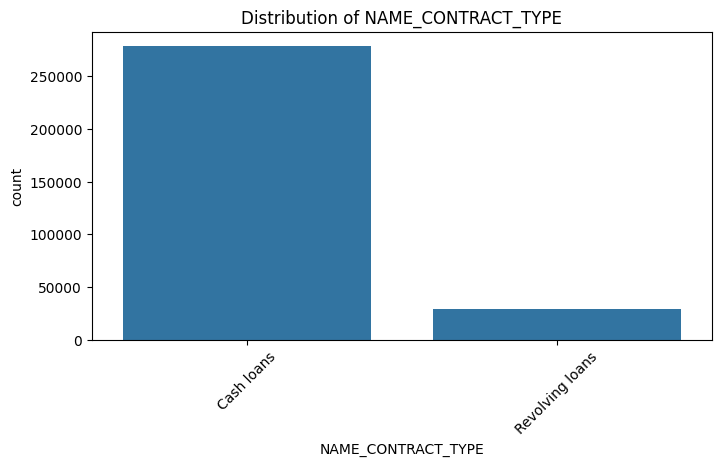

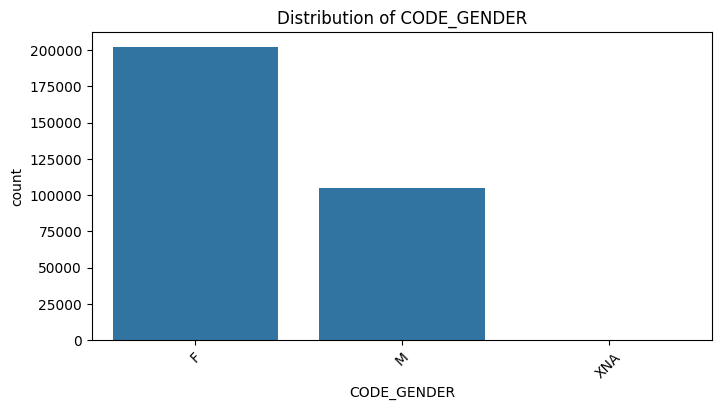

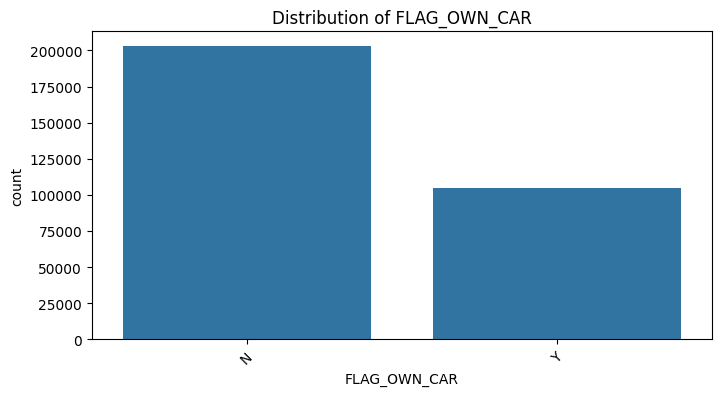

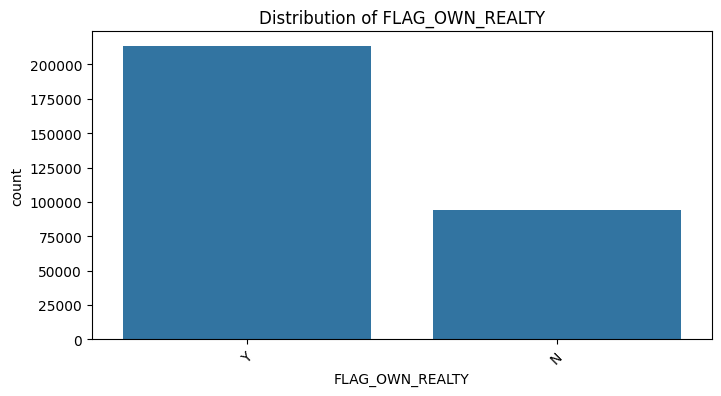

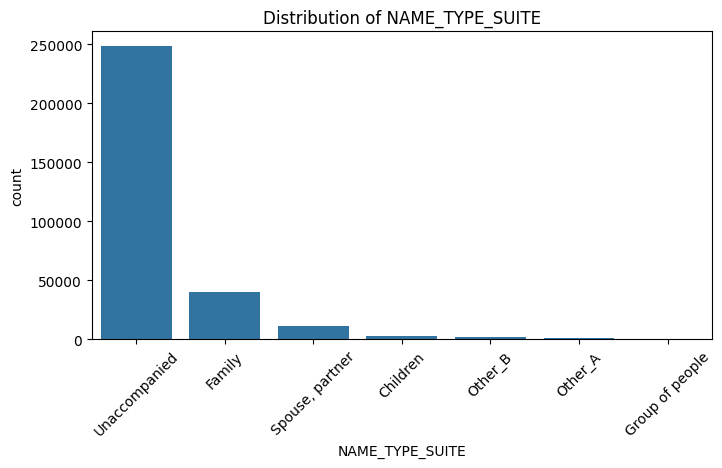

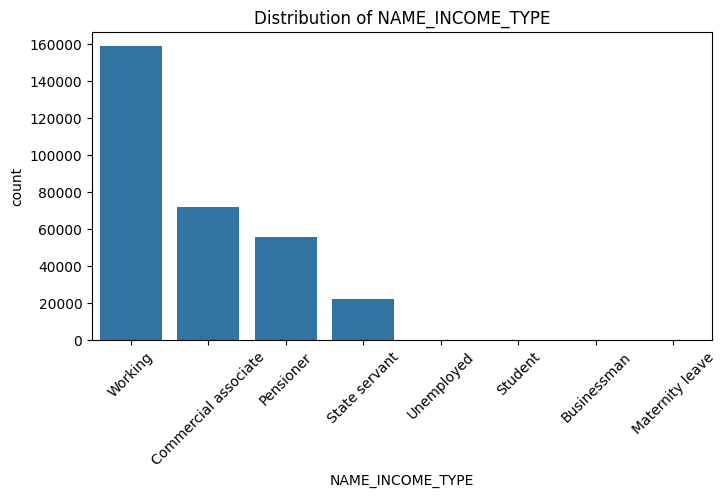

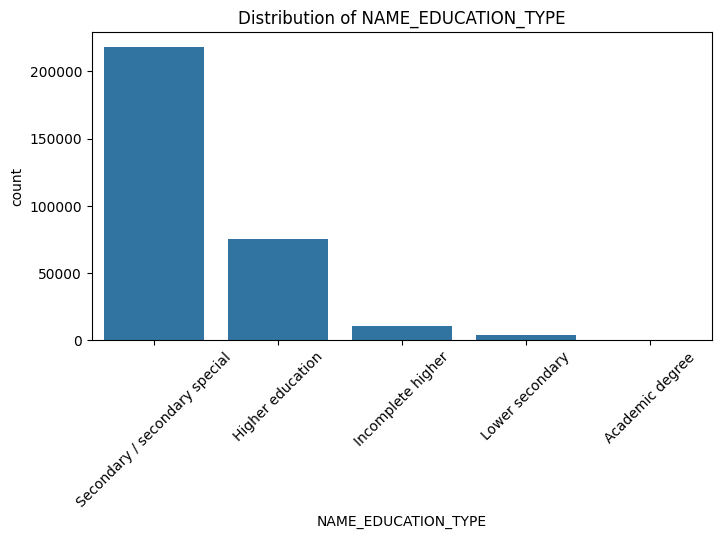

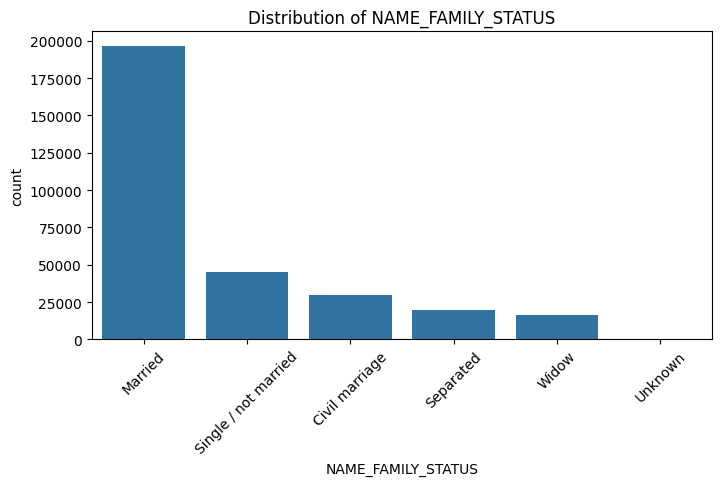

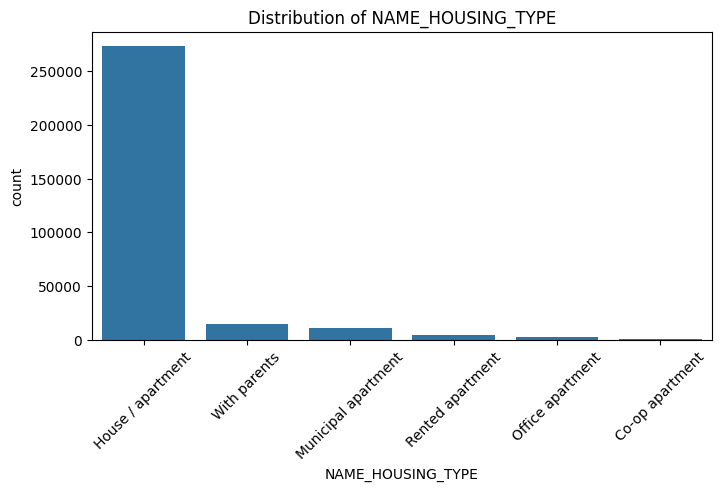

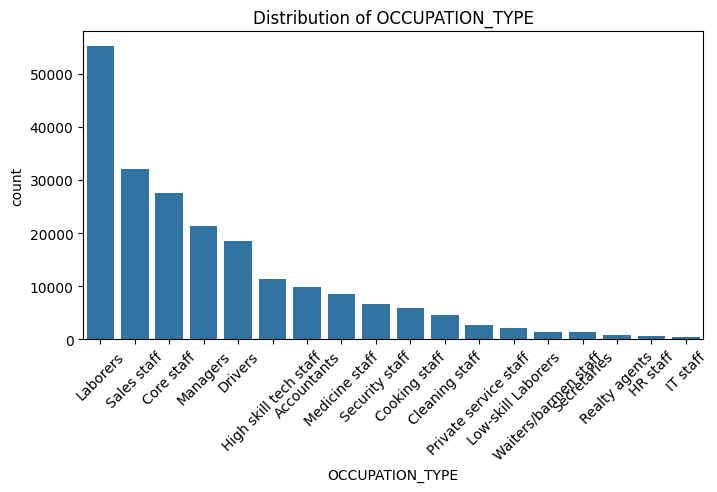

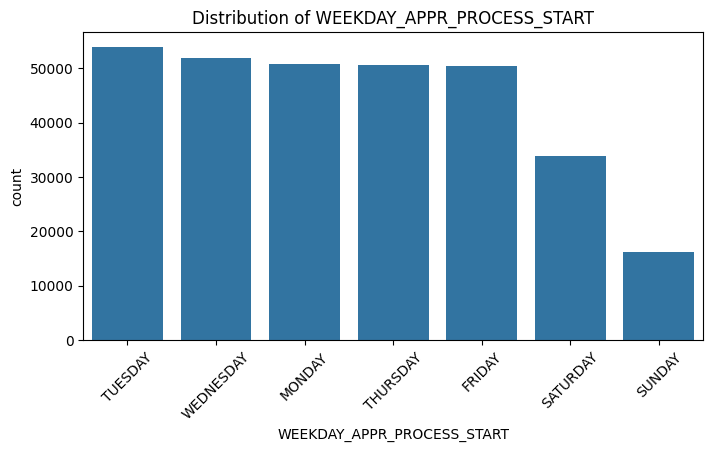

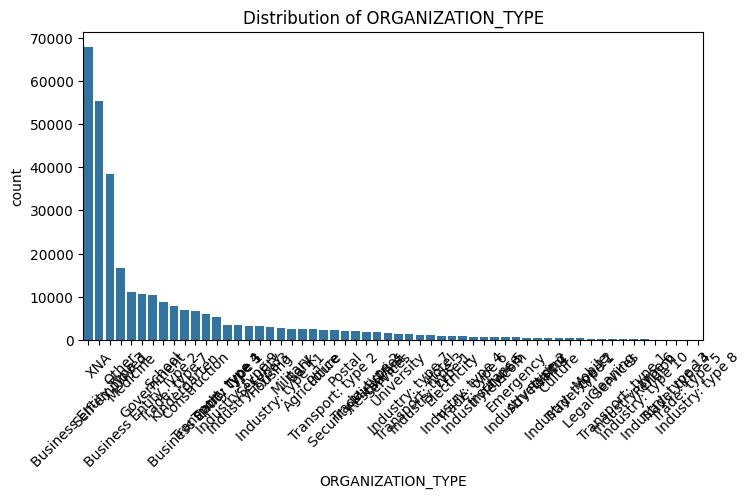

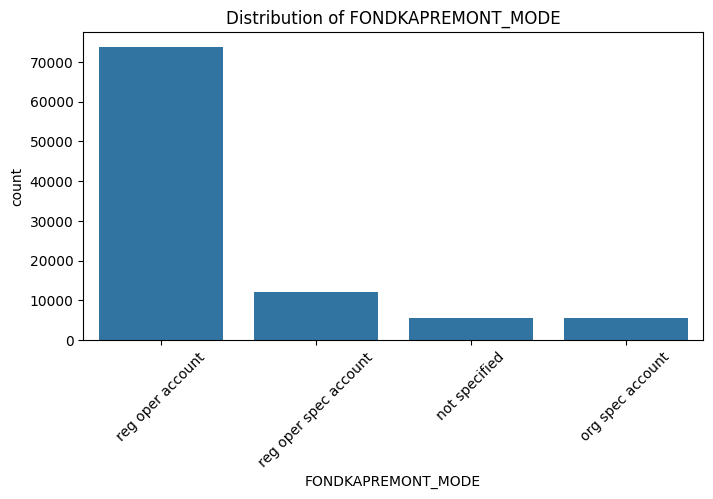

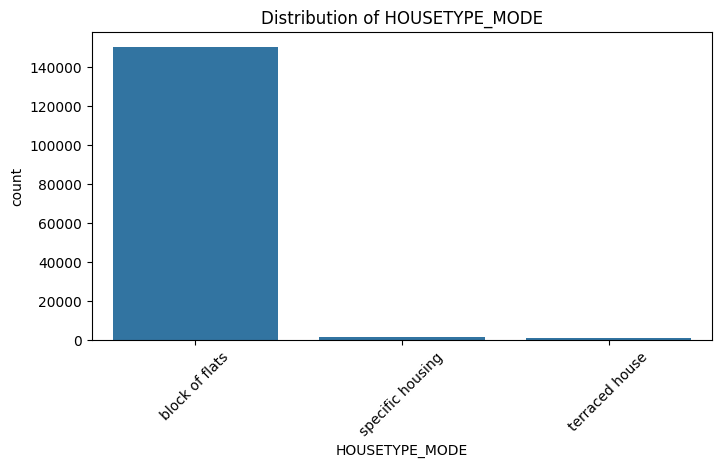

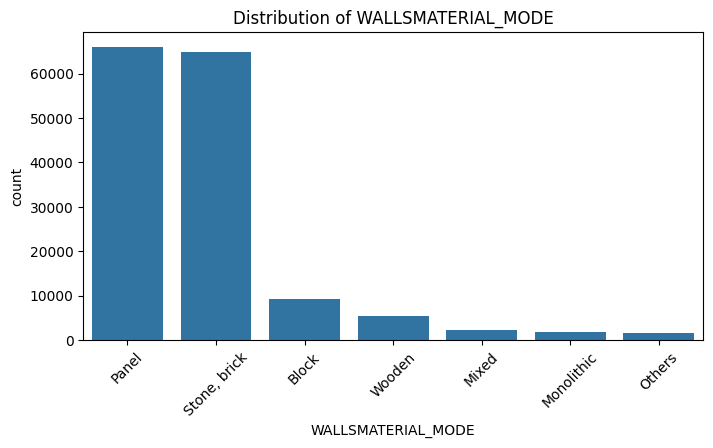

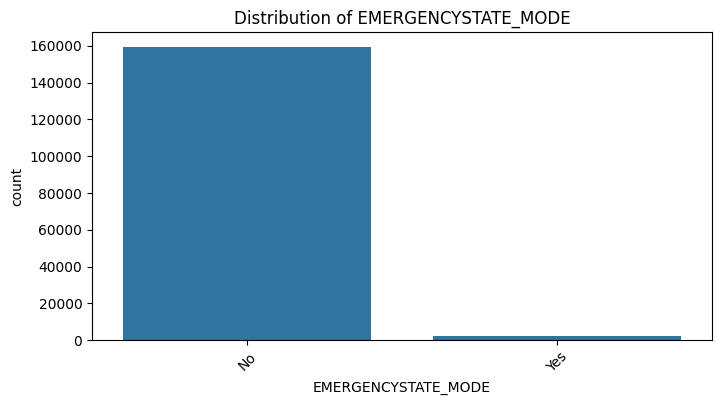

In [48]:
import seaborn as sns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Untuk kategori yang tidak normal seperti:
- Gender dengan value XNA bisa dihapus saja
- NAME_INCOMING_TYPE value 'Unemployed' dan lainnya <22 data, maka dihapus

Hal ini bisa menyebabkan noise bagi model. Atau opsi lain, kategori yang sedikit bisa digabungkan saja menjadi 'Others'

### Numerical Features Analysis

<Figure size 1200x800 with 0 Axes>

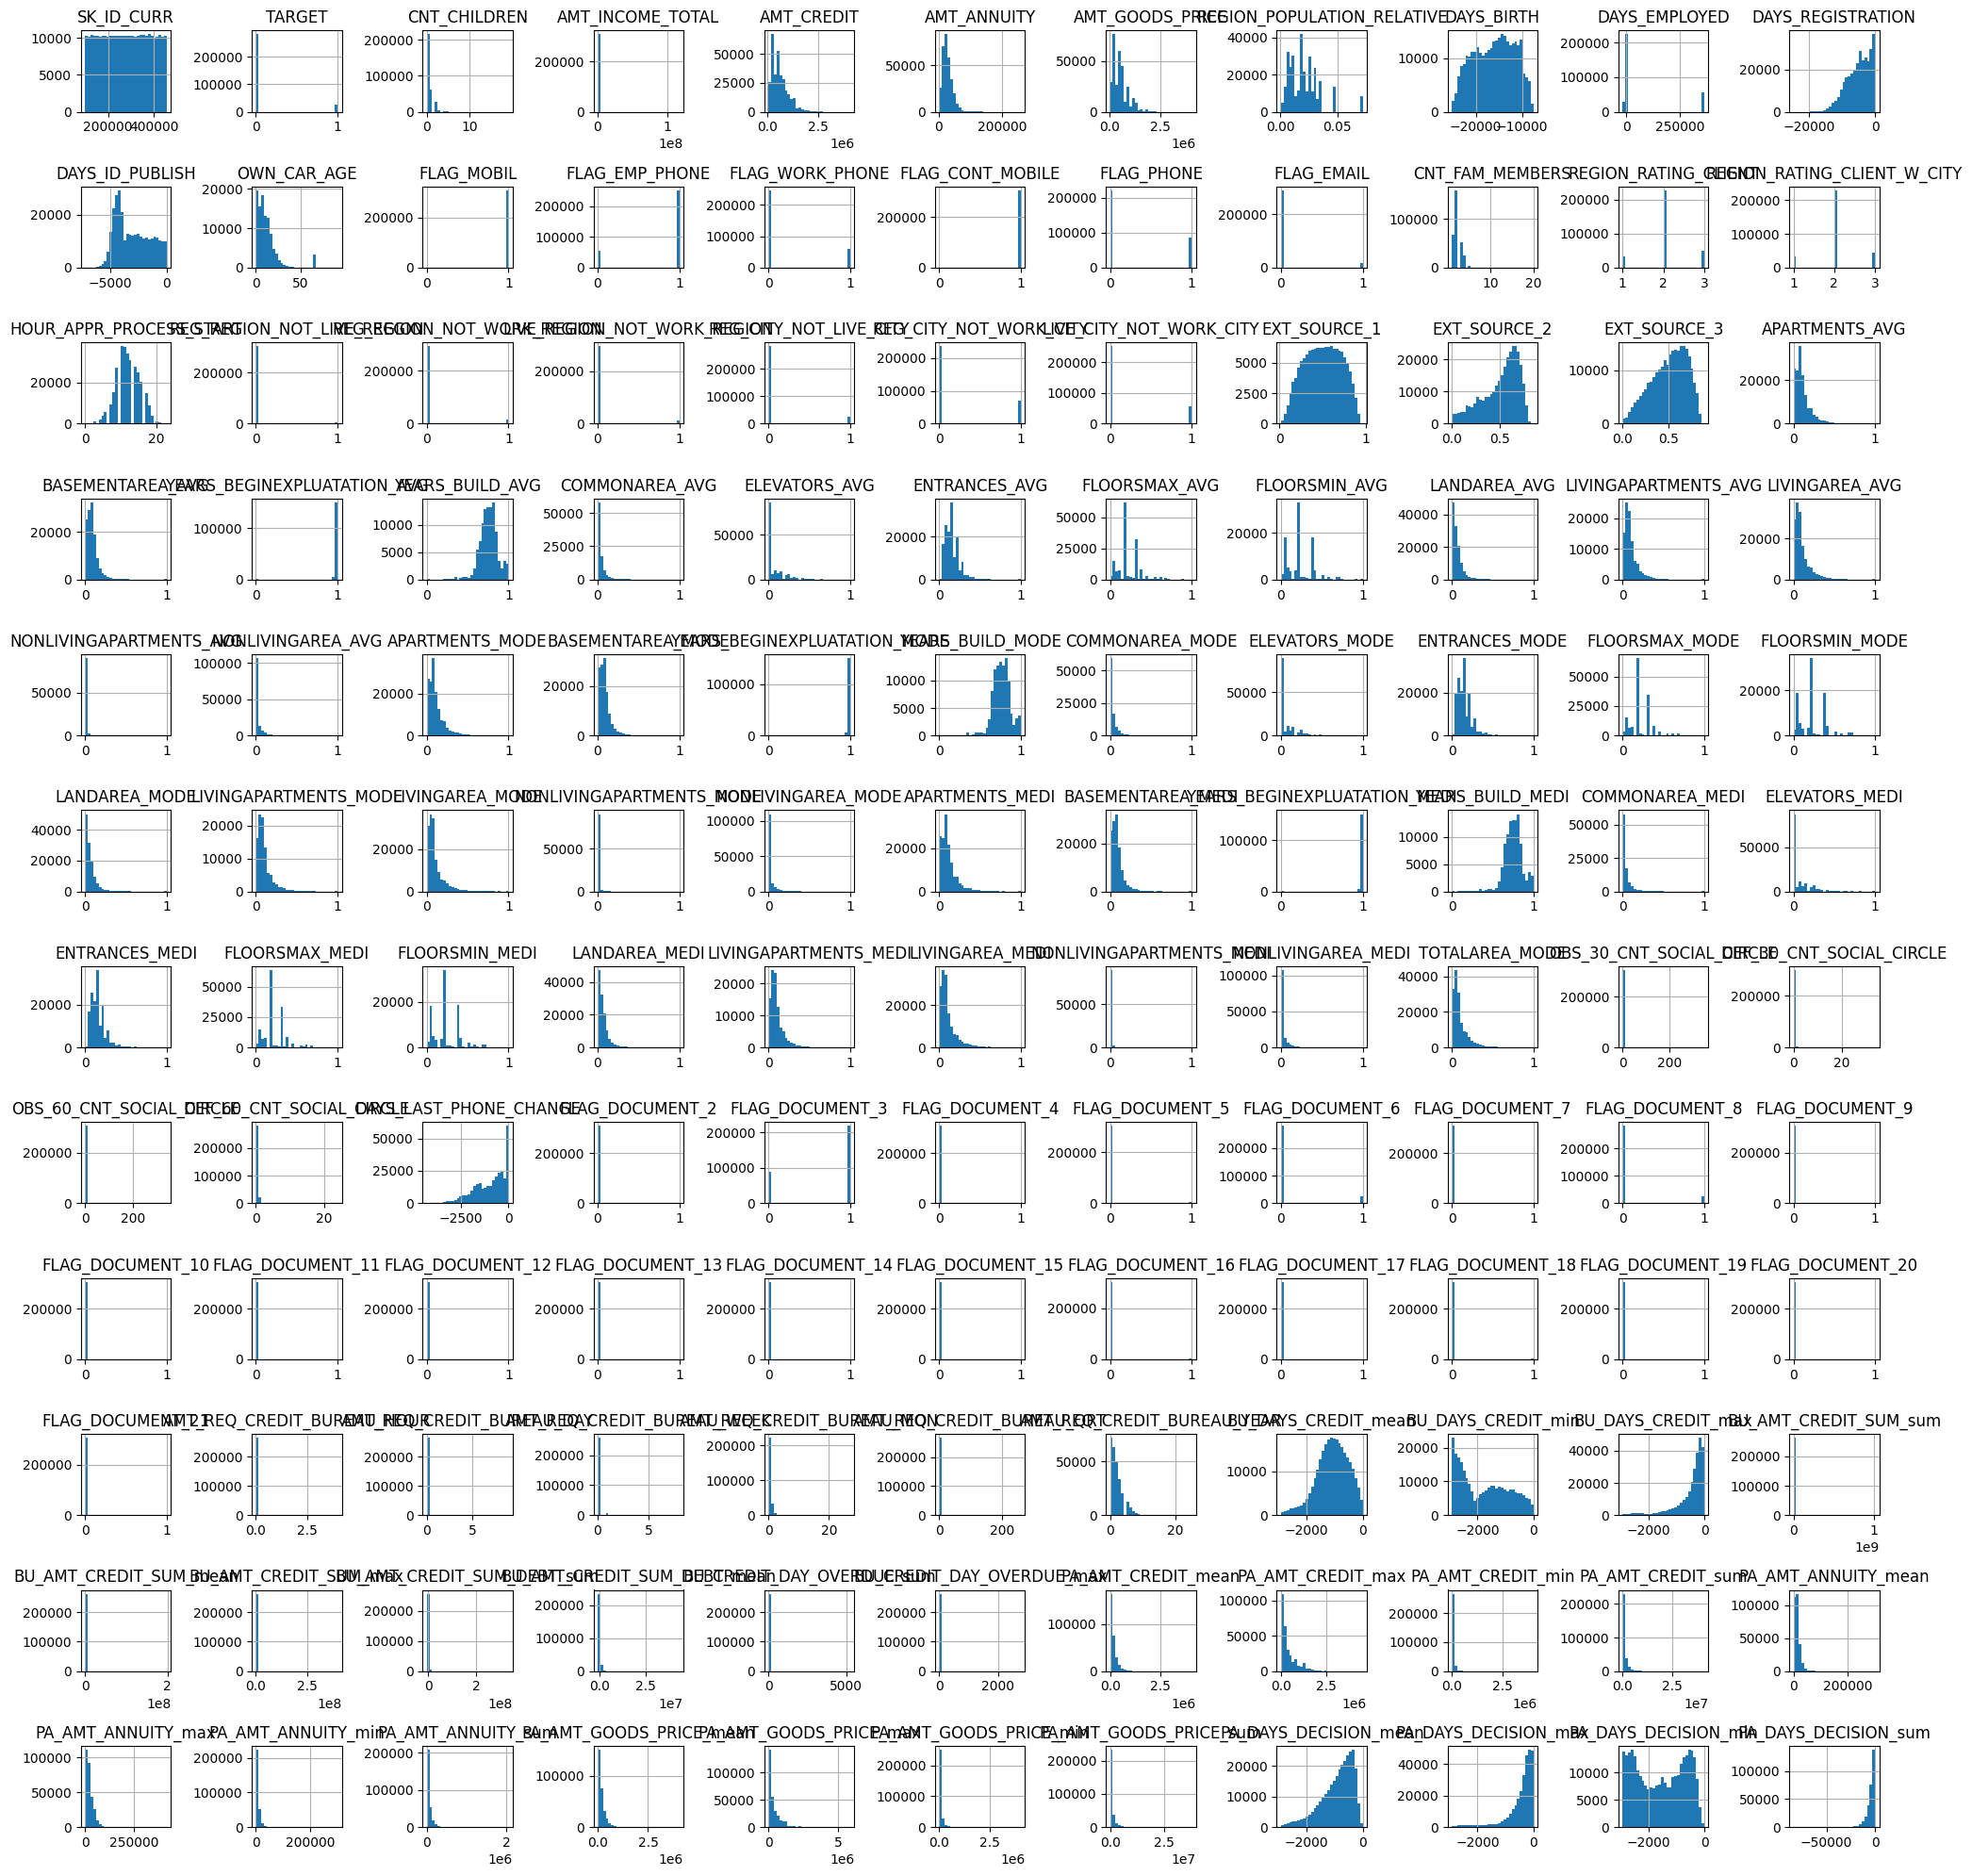

In [33]:
num_cols = train_merged.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12,8))
train_merged[num_cols].hist(figsize=(20,20), bins=30)
plt.tight_layout()
plt.show()

### Outlier Analysis

In [34]:
Q1 = train_merged[num_cols].quantile(0.25)
Q3 = train_merged[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((train_merged[num_cols] < (Q1 - 1.5*IQR)) | 
            (train_merged[num_cols] > (Q3 + 1.5*IQR))).sum()

outliers.sort_values(ascending=False).head(20)

REGION_RATING_CLIENT           80527
REGION_RATING_CLIENT_W_CITY    78027
DAYS_EMPLOYED                  72217
REG_CITY_NOT_WORK_CITY         70867
FLAG_WORK_PHONE                61308
FLAG_EMP_PHONE                 55386
LIVE_CITY_NOT_WORK_CITY        55215
AMT_REQ_CREDIT_BUREAU_QRT      50575
AMT_REQ_CREDIT_BUREAU_MON      43759
DEF_30_CNT_SOCIAL_CIRCLE       35166
PA_AMT_GOODS_PRICE_max         29349
FLAG_DOCUMENT_6                27078
DEF_60_CNT_SOCIAL_CIRCLE       25769
PA_AMT_GOODS_PRICE_sum         25654
BU_AMT_CREDIT_SUM_DEBT_sum     25404
BU_AMT_CREDIT_SUM_DEBT_mean    25083
FLAG_DOCUMENT_8                25024
TARGET                         24825
PA_AMT_CREDIT_sum              24399
BU_AMT_CREDIT_SUM_mean         24086
dtype: int64

Berdasarkan Aturan Tukey untuk Mengidentifikasi nilai ekstrem (outlier) dalam sebuah dataset digunakan kuartil Q1 dan Q3. 

### Relationships Plots

In [38]:
# Correlation with TARGET
correlations = train_merged[num_cols].corr()['TARGET'].sort_values(ascending=False)
print(correlations.head(20))
print(correlations.tail(20))

TARGET                         1.000000
BU_DAYS_CREDIT_mean            0.089729
DAYS_BIRTH                     0.078239
BU_DAYS_CREDIT_min             0.075248
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
PA_DAYS_DECISION_min           0.053434
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
BU_DAYS_CREDIT_max             0.049782
PA_DAYS_DECISION_mean          0.046864
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64
ELEVATORS_MODE               -0.032131
PA_AMT_ANNUITY_min           -0.032249
TOTALAREA_MODE               -0.032596
FLOORSMIN_MODE               -0.032698
LIVINGAREA_MEDI

In [39]:
# Feature importance using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = train_merged.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train_merged['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
for col in X_train.select_dtypes(include=['object','category']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_valid[col] = le.transform(X_valid[col].astype(str))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print(importances.head(20))
print(importances.tail(20))

EXT_SOURCE_2              0.039987
EXT_SOURCE_3              0.034813
DAYS_BIRTH                0.020488
DAYS_ID_PUBLISH           0.019925
DAYS_REGISTRATION         0.019817
EXT_SOURCE_1              0.019407
PA_DAYS_DECISION_mean     0.019170
BU_DAYS_CREDIT_max        0.018966
PA_DAYS_DECISION_max      0.018530
BU_DAYS_CREDIT_mean       0.018447
PA_DAYS_DECISION_min      0.018311
PA_DAYS_DECISION_sum      0.017934
AMT_ANNUITY               0.017603
PA_AMT_GOODS_PRICE_min    0.017400
PA_AMT_ANNUITY_min        0.017371
DAYS_EMPLOYED             0.017366
PA_AMT_CREDIT_mean        0.017034
PA_AMT_ANNUITY_mean       0.016934
PA_AMT_CREDIT_sum         0.016832
PA_AMT_ANNUITY_sum        0.016680
dtype: float64
AMT_REQ_CREDIT_BUREAU_DAY     6.266524e-04
AMT_REQ_CREDIT_BUREAU_HOUR    4.987712e-04
FLAG_DOCUMENT_16              3.499416e-04
FLAG_DOCUMENT_18              3.190088e-04
FLAG_CONT_MOBILE              2.886444e-04
FLAG_DOCUMENT_9               2.718784e-04
FLAG_DOCUMENT_11           

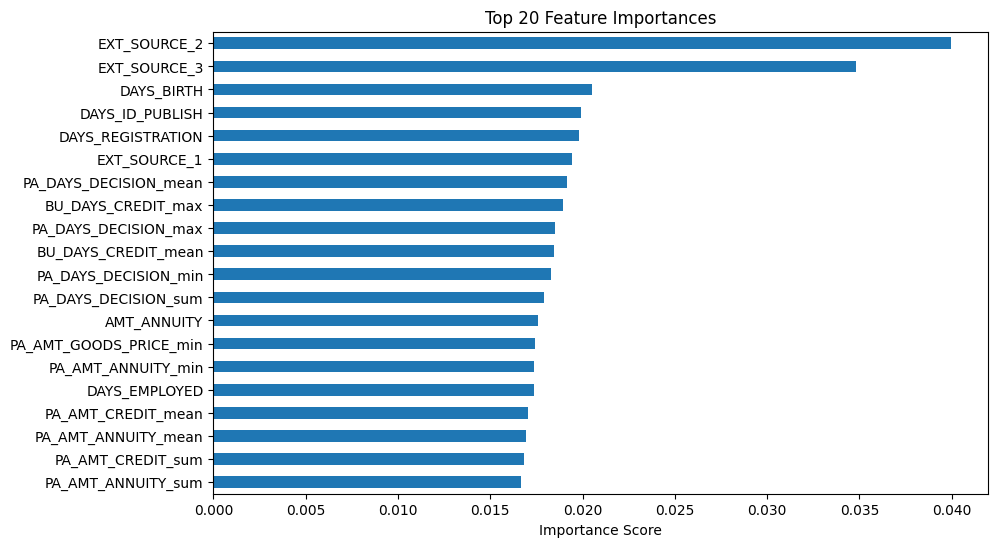

In [40]:
# Visualize feature importance
plt.figure(figsize=(10,6))
importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()